In [73]:
#Sentiment analysis

In [ ]:
!pip install tweepy
!pip install textblob
!pip install WordCloud
!pip install pandas
!pip install numpy
!pip install re
!pip install matplotlib
!pip install pipreqs


In [75]:
 import tweepy
 from textblob import TextBlob
 from wordcloud import WordCloud
 import pandas as pd
 import numpy as np
 import re
 import  matplotlib.pyplot as plt
 plt.style.use('fivethirtyeight')


In [76]:
#load the data
from google.colab import files
uploaded = files.upload()


Saving tweetcreds.csv to tweetcreds (1).csv


In [77]:
#get the data
log = pd.read_csv('tweetcreds.csv')

In [78]:
#Twitter API Credentials
consumerKey=log['key'][0]
consumerSecret=log['key'][1]
accessToken=log['key'][2]
accessTokenSecret = log['key'][3]

In [79]:
#create authentication object
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)

#set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#create the API onject
api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [80]:
username=input("enter the username :")
no_of_tweets=int(input("enter the number of tweets :"))

enter the username :elonmusk
enter the number of tweets :500


In [81]:
# Extract 100 tweets from twitter user
posts = api.user_timeline(screen_name = username, count=no_of_tweets,lang='en',tweet_mode="extended")

#print last 5 tweets
for tweet in posts[0:5]:
  print(tweet.full_text + '\n')

@lexfridman Mind-blowing that over 80% of humans have a smart phone

Starship launch &amp; catch tower https://t.co/5mLIQwwu0k

https://t.co/uiHoMrpifZ

@BLKMDL3 @Tesla It’s our best car ever, along with the Plaid X

@WholeMarsBlog It was a mistake to try to use the Elise. In the end, only ~5% of the Elise parts ended up being used. Tesla Roadster is a totally different car.



In [82]:
df=pd.DataFrame([tweet.full_text for tweet in posts ],columns=['Tweets'])
df.head()

,Tweets
0,@lexfridman Mind-blowing that over 80% of huma...
1,Starship launch &amp; catch tower https://t.co...
2,https://t.co/uiHoMrpifZ
3,"@BLKMDL3 @Tesla It’s our best car ever, along ..."
4,@WholeMarsBlog It was a mistake to try to use ...


In [83]:
#clean the text

#create a function to clean tweets
def cleanTxt(text):
  #text=re.sub(r'@[A-Za-z0-9]+','',text) # remove @ mentions
  text=re.sub(r"(?:\@|http?\://|https?\://|www)\S+", '', text)
  text=" ".join(text.split())
  text=re.sub(r'#','',text) #remove hashtags
  text = re.sub(r'RT[\s]+','',text) #remove RT

  #text=re.sub(r'https?:\/\/\S+','',text) #remove the hyper link
  emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F" "]+", flags = re.UNICODE) #remove emojis
  text=emoji_pattern.sub(r'', text)

  return text

df['Tweets']=df['Tweets'].apply(cleanTxt)

#show 
df

,Tweets
0,Mind-blowing that over 80% of humans have a sm...
1,Starship launch &amp; catch tower
2,
3,"It’s our best car ever, along with the Plaid X"
4,It was a mistake to try to use the Elise. In t...
...,...
195,What a hypocrite!
196,Interesting
197,Thank you!
198,"Yup, that’s the plan!"


In [84]:
#function to get subjectivity ( opinons )

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#function to get Polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create new columns
df['subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

#show new df with new columns
df

,Tweets,subjectivity,Polarity
0,Mind-blowing that over 80% of humans have a sm...,0.642857,0.214286
1,Starship launch &amp; catch tower,0.000000,0.000000
2,,0.000000,0.000000
3,"It’s our best car ever, along with the Plaid X",0.300000,1.000000
4,It was a mistake to try to use the Elise. In t...,0.800000,0.000000
...,...,...,...
195,What a hypocrite!,0.000000,0.000000
196,Interesting,0.500000,0.500000
197,Thank you!,0.000000,0.000000
198,"Yup, that’s the plan!",0.000000,0.000000


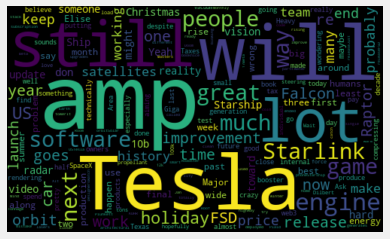

In [85]:
from pandas.core.common import random_state
#word cloud
allWords=''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500,height=300,random_state=21,max_font_size=120).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()


In [86]:
#create a function to compute the -ve,+ve and neutral analysis

def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)

df


,Tweets,subjectivity,Polarity,Analysis
0,Mind-blowing that over 80% of humans have a sm...,0.642857,0.214286,Positive
1,Starship launch &amp; catch tower,0.000000,0.000000,Neutral
2,,0.000000,0.000000,Neutral
3,"It’s our best car ever, along with the Plaid X",0.300000,1.000000,Positive
4,It was a mistake to try to use the Elise. In t...,0.800000,0.000000,Neutral
...,...,...,...,...
195,What a hypocrite!,0.000000,0.000000,Neutral
196,Interesting,0.500000,0.500000,Positive
197,Thank you!,0.000000,0.000000,Neutral
198,"Yup, that’s the plan!",0.000000,0.000000,Neutral


In [87]:
#print all of positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) Mind-blowing that over 80% of humans have a smart phone

2) It’s our best car ever, along with the Plaid X

3) Beta 10.9 should be ready in about a week. Beta 11 with single city/highway software stack &amp; many other architectural upgrades probably next month.

4) Solar Roof generates clean energy to keep your home warm during the cold winter months 📸: Plunkett+KUHR Designers

5) Masters of Doom is a great book

6) nice

7) Major improvement!

8) Tonnage to orbit is the more fundamental metric

9) Raptor 2 now operates routinely at 300 bar main chamber pressure

10) Great work by Tesla team worldwide!

11) Many UI improvements coming

12) Predicting macroeconomics is challenging, to say the least. My gut feel is maybe around spring or summer 2022, but not later than 2023.

13) Probably not wrong

14) Ashok was the first person recruited from my tweet saying that Tesla is starting an Autopilot team!

15) FAA approval is the schedule driver. Their latest update says end of February.

In [88]:
#print all of negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) Monthly subscription price will rise when FSD goes to wide release

2) Absolutely. This is just bad math.

3) If history is any guide, not many will make it past the next recession

4) Wow, working on this problem has soaked up a lot of my time &amp; brain cycles over the past ~7 years! This and Starship engines are currently the two hardest problems.

5) Yeah, the smarter someone is, the harder it is to simulate/predict their behavior

6) It is simulations all the way down, until you get to one bit

7) So much of AI is about compressing reality to a small vector space, like a video game in reverse

8) As goes Norway, so goes the world. That said, still a long way to go to replace the fleet of combustion vehicles on the road.

9) That was a crazy tough year. Tesla financing closed at 6pm Christmas Eve – last hour of the last day possible. Payroll would otherwise have bounced two days after Christmas.

10) Tesla holiday software update goes to wide release today!

11) Yeah, I didn’t 

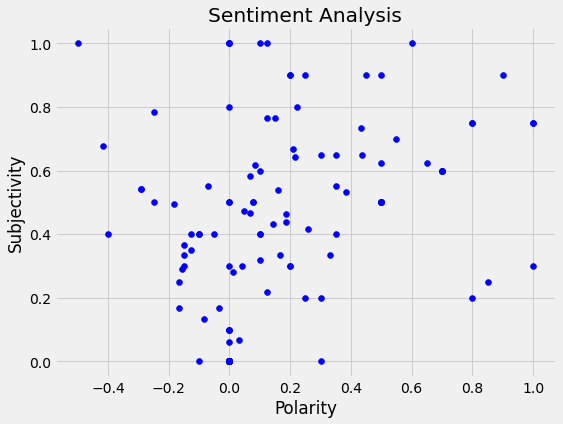

In [89]:
#plot polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [90]:
#get percentage of positive tweets
ptweets=df[df.Analysis == 'Positive']
ptweets=ptweets['Tweets']

round((ptweets.shape[0]/ df.shape[0])*100,1)

33.5

In [91]:
#get percentage of negative tweets
ntweets=df[df.Analysis == 'Negative']
ntweets=ntweets['Tweets']

round((ntweets.shape[0]/ df.shape[0])*100,1)

11.5

In [92]:
#get percentage of neutral tweets
nntweets=df[df.Analysis == 'Neutral']
nntweets=nntweets['Tweets']

round((nntweets.shape[0]/ df.shape[0])*100,1)

55.0

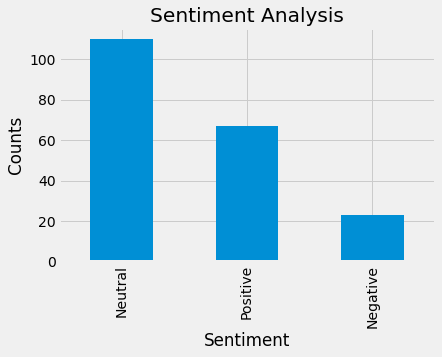

In [93]:
#show the value counts

df['Analysis'].value_counts()

#plot an viz
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')


df['Analysis'].value_counts().plot(kind='bar')
plt.show()
